In [37]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Step 1: Combine multiple CSVs into one
def combine_csvs(input_folder, output_file):
    """
    Combine multiple CSV files into one.

    Args:
        input_folder (str): Path to the folder containing CSV files.
        output_file (str): Path to save the combined CSV.
    """
    all_files = glob.glob(f"{input_folder}/*.csv")
    combined_df = pd.concat((pd.read_csv(file) for file in all_files), ignore_index=True)
    combined_df.to_csv(output_file, index=False)
    print(f"Combined CSV saved to {output_file}")
    return combined_df

combined_df = combine_csvs("test_csv", "combined_data.csv")

Combined CSV saved to combined_data.csv


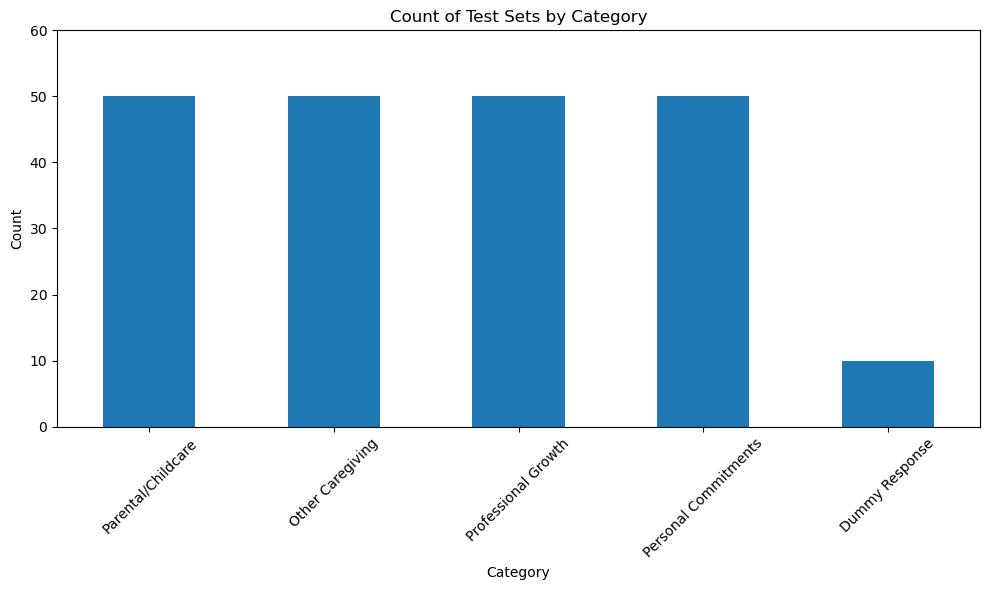

In [38]:
# Bar chart: Count of test sets by category
combined_df['category'].value_counts().plot(kind='bar', figsize=(10, 6))
#scale the y-axis to go up to 100
plt.title('Count of Test Sets by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(0, max(combined_df['category'].value_counts()) + 10)

plt.tight_layout()
plt.show()


([<matplotlib.axis.XTick at 0x17565cad0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

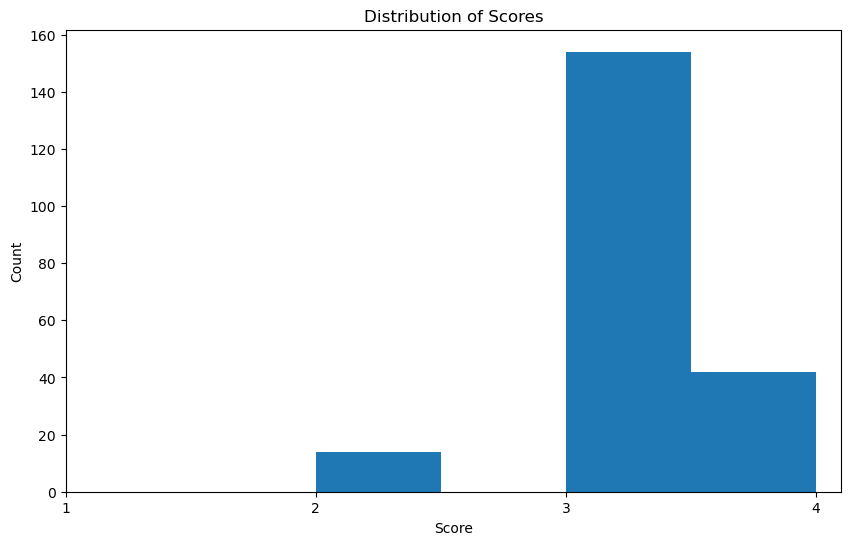

In [39]:
# Histogram: Distribution of scores (1,2,3,4)
# x ticks should be 1, 2, 3, 4
combined_df['score'].plot(kind='hist', bins=4, figsize=(10, 6))
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(range(1, 5))


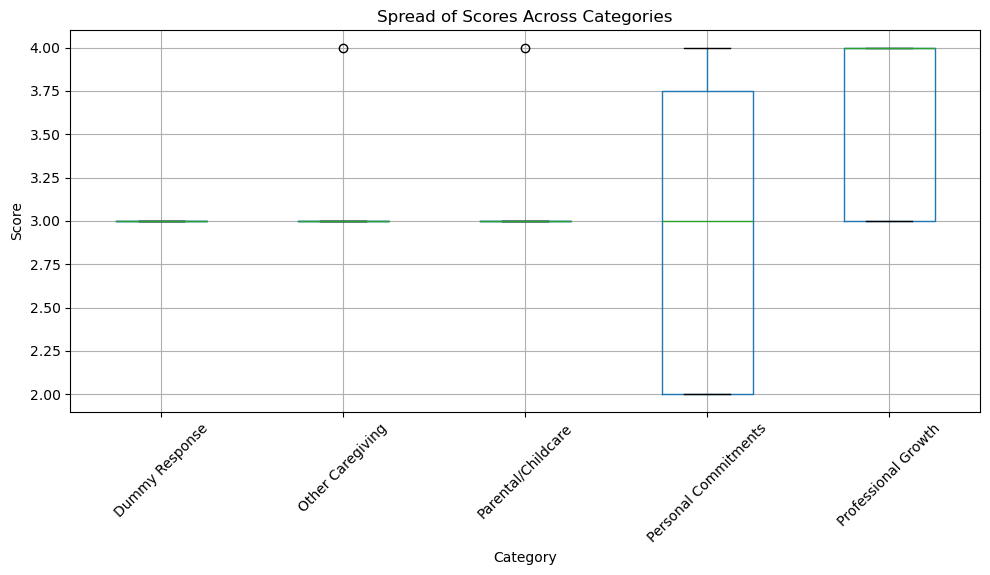

In [40]:
# Box plot: Spread of scores across categories
combined_df.boxplot(column='score', by='category', figsize=(10, 6))
plt.title('Spread of Scores Across Categories')
plt.suptitle('')  # remove the title that pandas adds
plt.xlabel('Category')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

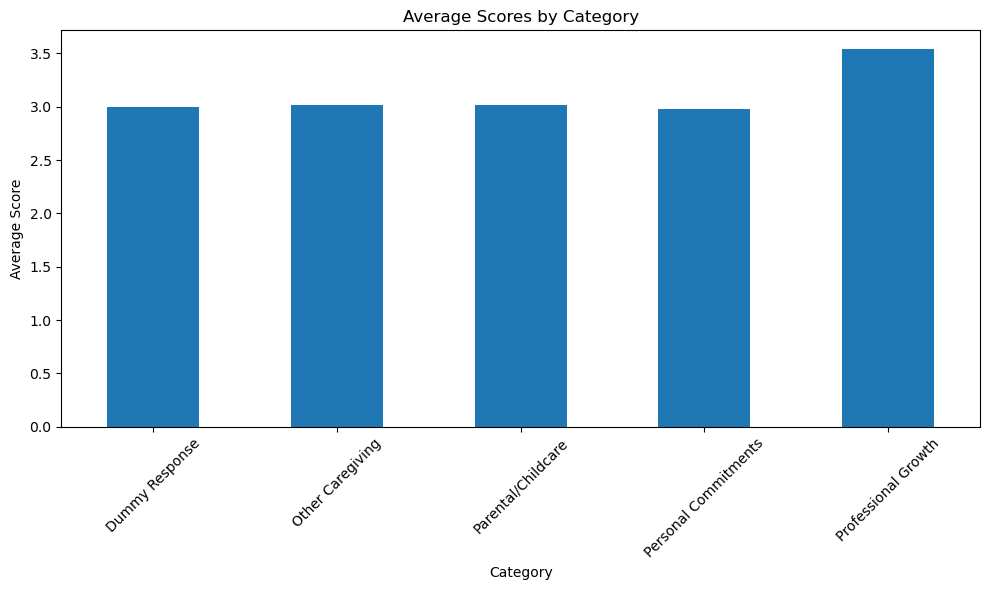

In [41]:
# Grouped bar chart: Average scores by category
combined_df.groupby('category')['score'].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Category')
plt.xlabel('Category')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


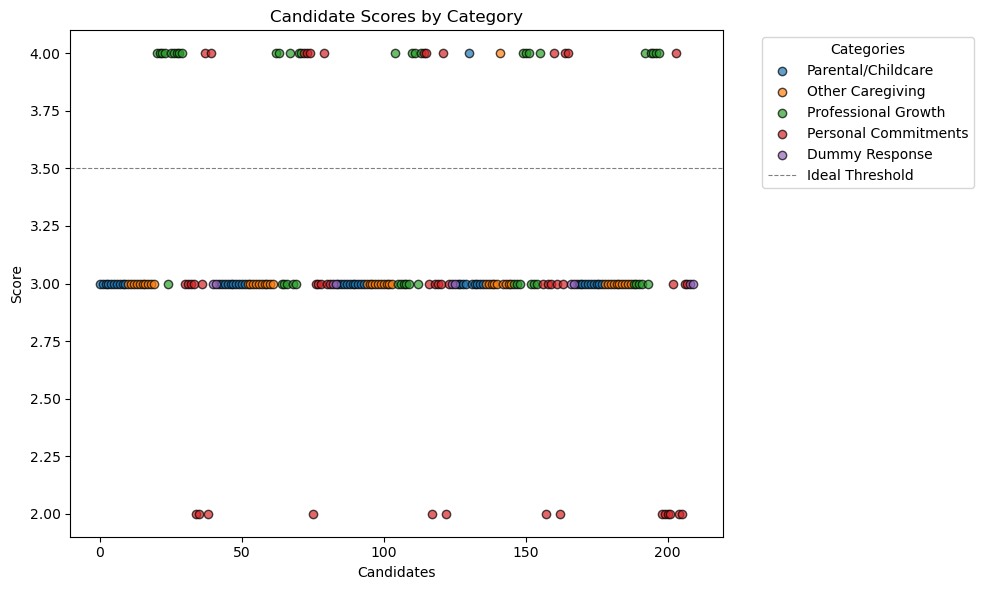

In [42]:
# Ensure category is treated as a categorical variable for consistent ordering in plots
combined_df['category'] = pd.Categorical(combined_df['category'])

# Plot the data
plt.figure(figsize=(10, 6))
categories =  combined_df['category'].unique()

for category in categories:
    subset = combined_df[combined_df['category'] == category]
    plt.scatter(
        subset.index, subset['score'],
        label=category, alpha=0.7, edgecolors='k'
    )

plt.axhline(y=3.5, color='gray', linestyle='dashed', linewidth=0.8, label='Ideal Threshold')
plt.xlabel('Candidates')
plt.ylabel('Score')
plt.title('Candidate Scores by Category')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/gx/r2dxbpbn79jbpfyjy53q29sc0000gn/T/ipykernel_27413/708405247.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=question_1_data, x='travel_template', y='score', hue='category', ci=None)


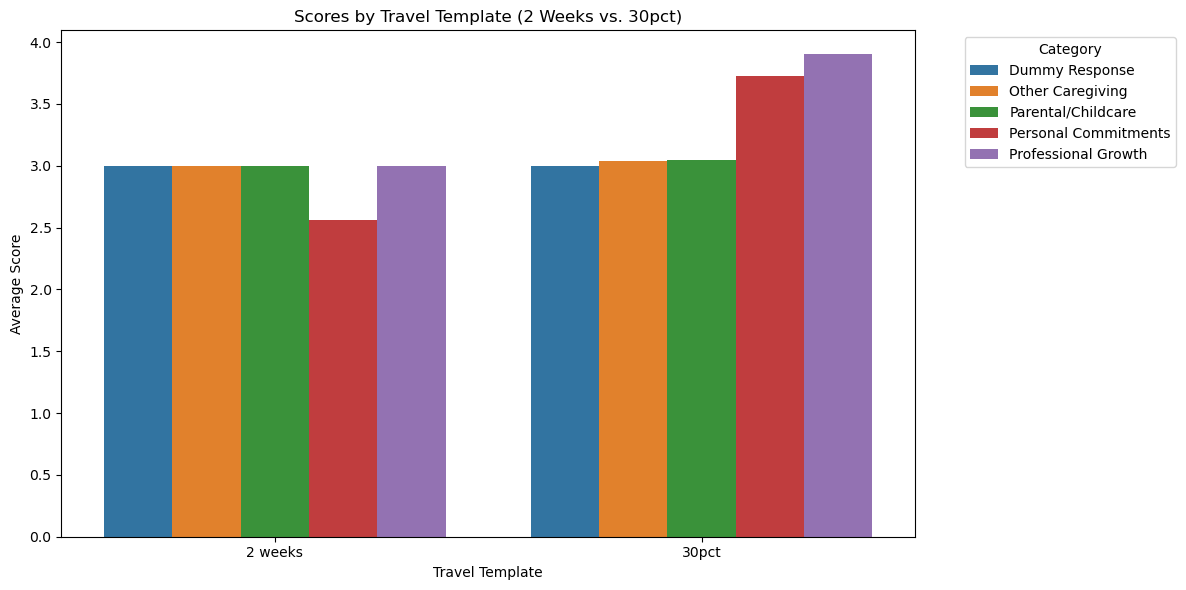

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter relevant data for Question 1
question_1_data = combined_df[['travel_template', 'score', 'category']]

# Create a barplot for scores based on "travel_template"
plt.figure(figsize=(12, 6))
sns.barplot(data=question_1_data, x='travel_template', y='score', hue='category', ci=None)

plt.title('Scores by Travel Template (2 Weeks vs. 30pct)')
plt.xlabel('Travel Template')
plt.ylabel('Average Score')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


/var/folders/gx/r2dxbpbn79jbpfyjy53q29sc0000gn/T/ipykernel_27413/3608931400.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_scores = combined_df.groupby('category')['score'].mean().sort_values()
/var/folders/gx/r2dxbpbn79jbpfyjy53q29sc0000gn/T/ipykernel_27413/3608931400.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='viridis')


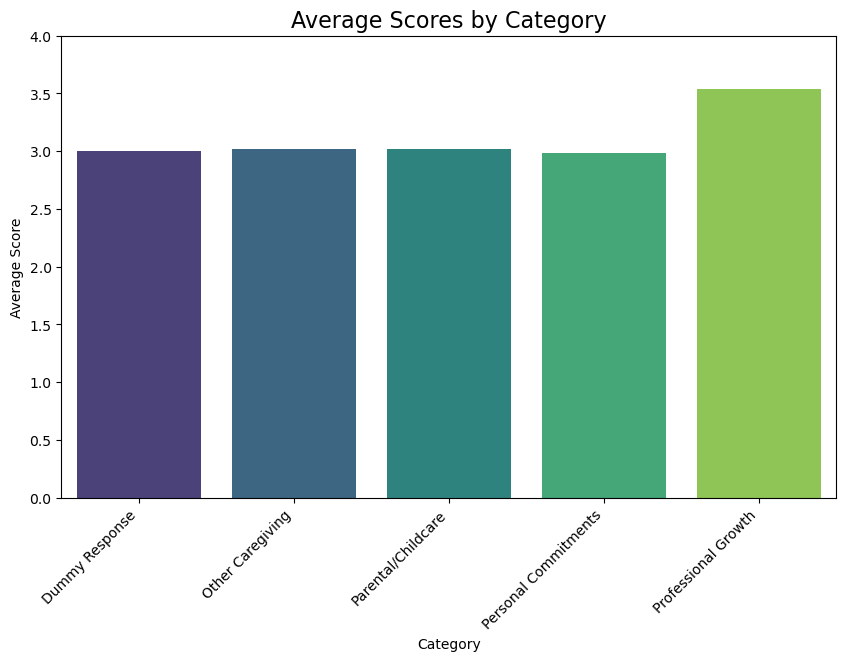

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average scores for each category
avg_scores = combined_df.groupby('category')['score'].mean().sort_values()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='viridis')
plt.title('Average Scores by Category', fontsize=16)
plt.ylabel('Average Score')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 4)
plt.show()


/var/folders/gx/r2dxbpbn79jbpfyjy53q29sc0000gn/T/ipykernel_27413/117517940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='category', y='score', palette='muted')


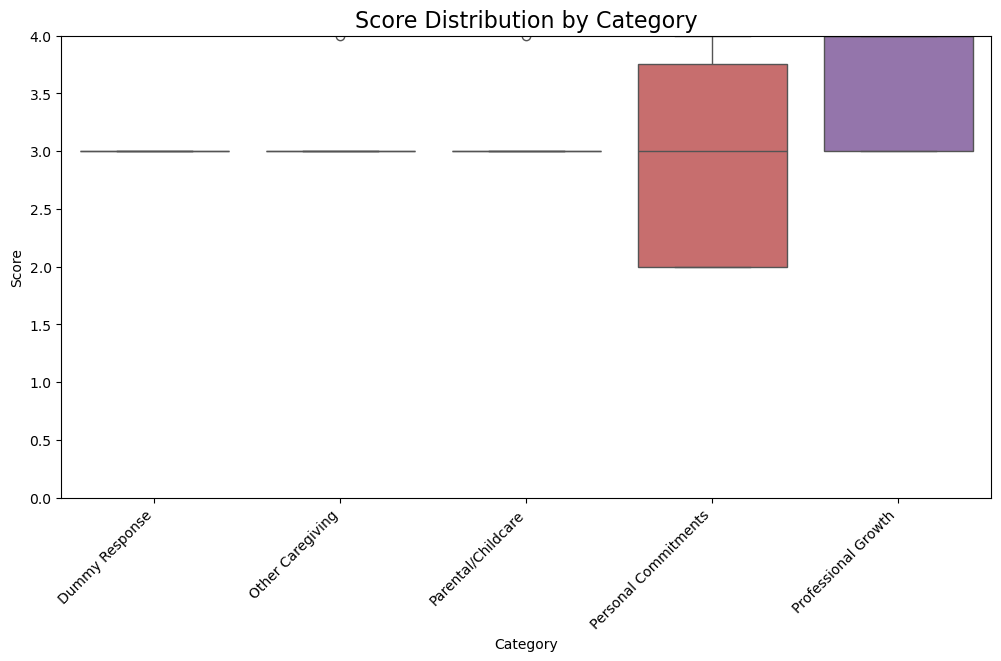

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x='category', y='score', palette='muted')
plt.title('Score Distribution by Category', fontsize=16)
plt.ylabel('Score')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 4)
plt.show()


/var/folders/gx/r2dxbpbn79jbpfyjy53q29sc0000gn/T/ipykernel_27413/1777848152.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = combined_df.pivot_table(


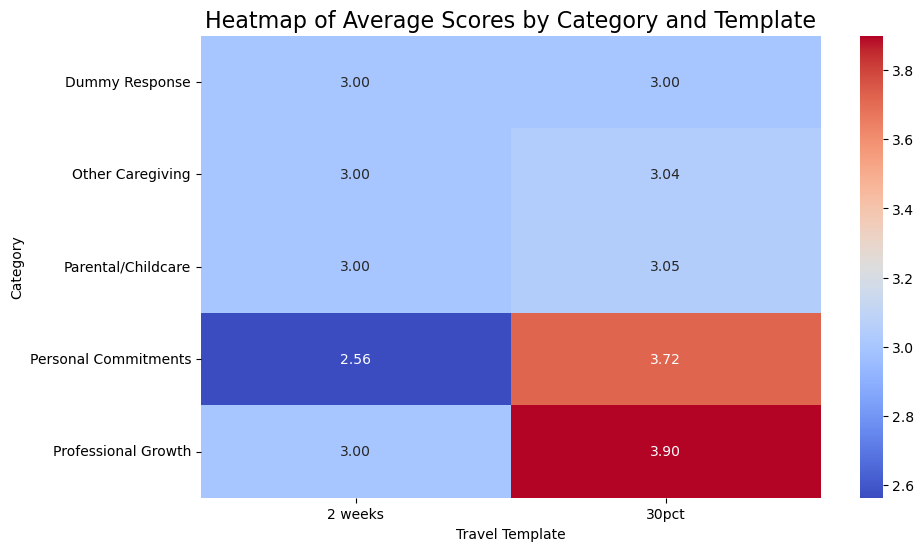

In [50]:
import pandas as pd

# Create a pivot table for scores by category and template
pivot_table = combined_df.pivot_table(
    index='category', 
    columns='travel_template', 
    values='score', 
    aggfunc='mean'
)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Heatmap of Average Scores by Category and Template', fontsize=16)
plt.ylabel('Category')
plt.xlabel('Travel Template')
plt.show()


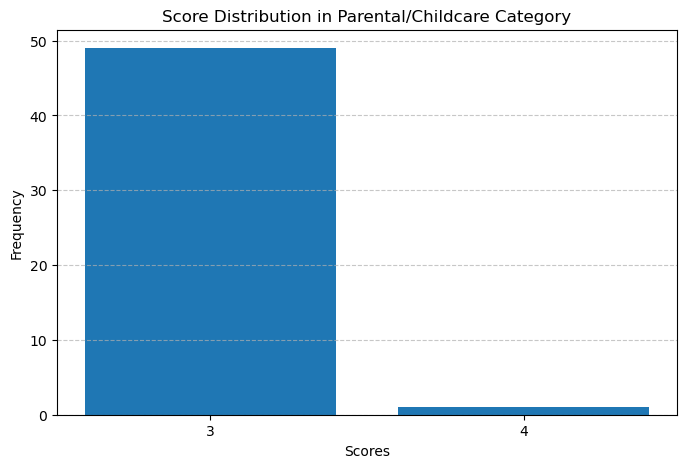

Average score in Parental/Childcare category: 3.02


In [52]:
import matplotlib.pyplot as plt

# Filter data for Parental/Childcare category
parental_data = combined_df[combined_df['category'] == 'Parental/Childcare']

# Count scores
score_counts = parental_data['score'].value_counts().sort_index()

# Plot bar chart for score distribution in Parental/Childcare
plt.figure(figsize=(8, 5))
plt.bar(score_counts.index, score_counts.values, tick_label=score_counts.index)
plt.title('Score Distribution in Parental/Childcare Category')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.xticks(score_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate and display average score
average_score = parental_data['score'].mean()
print(f"Average score in Parental/Childcare category: {average_score:.2f}")
